In [1]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.visualization import hist
from astropy.stats import mad_std
import astropy.units as u
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

from calibrate import show_image
from calibrate import calibrate_science

a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


ImageFileCollection(location=PosixPath('/home/localadmin/tmp/test/Flat Field/.cache/2048x2048/flat'))


Text(0.5, 1.0, 'calibrated frame')

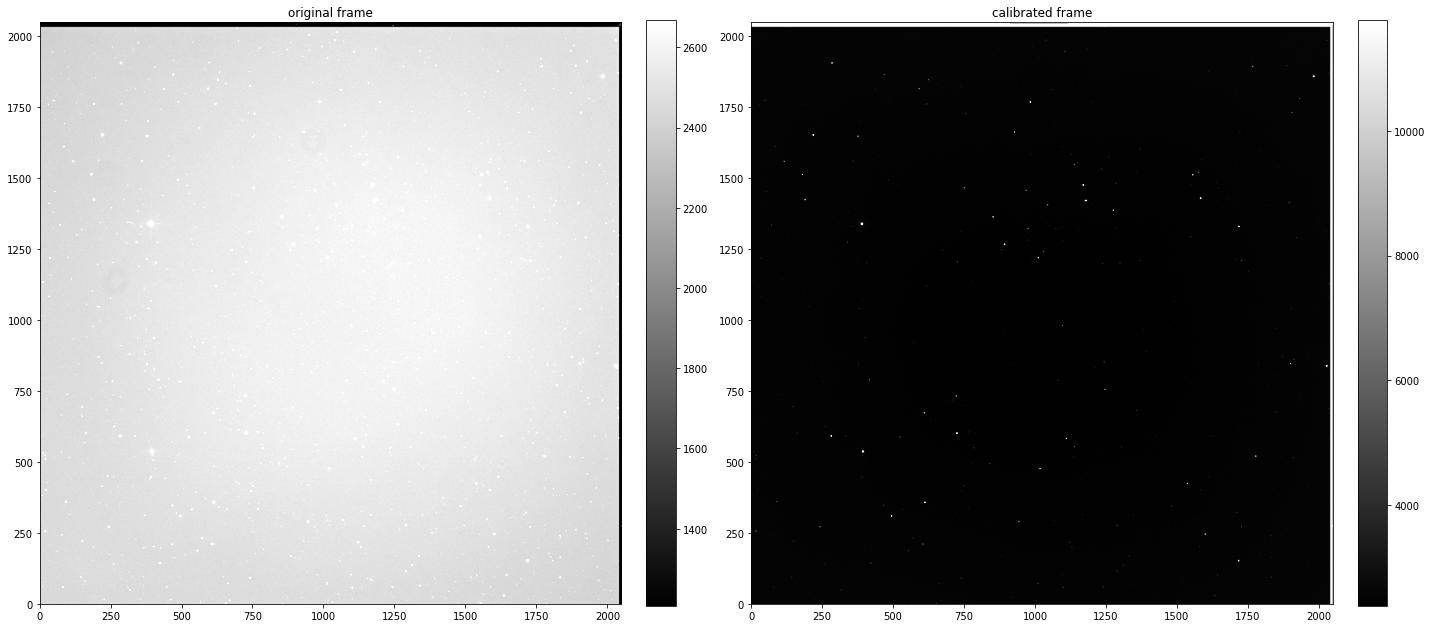

In [3]:
path = Path('/home/localadmin/tmp/test/')

science_frame = CCDData.read(path / 'PIRATE_271926_OSL_00_ds4336_CRTS_J144508_6_050514_00_R180_00_2020_05_09_01_39_46.fits', unit='adu')
bias_dir = path / 'Bias'
dark_dir = path / 'Dark'
flat_dir = path / 'Flat Field'

calibrated_frame = calibrate_science(
    science_frame,
    flat_path=flat_dir,
    bias_path=bias_dir,
    dark_path=dark_dir,
    subtract_bias=False,
    subtract_dark=False,
    divide_flat=True)

fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 40), tight_layout=True)

show_image(science_frame, cmap='gray', fig=fig, ax=axis1)
axis1.set_title('original frame')

show_image(calibrated_frame, cmap='gray', fig=fig, ax=axis2)
axis2.set_title('calibrated frame')
